In [14]:
import pandas as pd
import numpy as np
import networkx as nx
from scipy import stats
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [28]:
df = pd.read_excel('SignEpiPairs.xlsx')
df=df[df.pBon<0.05]

### 1. Dimensions

In [12]:
for i in range(1,13):
    print 'S'+str(i)
    templist = list(df[df.SegN==i].Perm)
    templist.extend(list(df[df.SegN==i].SubPerm))
    print len(set(templist))
    print '\n'

S1
45


S2
27


S3
24


S4
13


S5
15


S6
19


S7
0


S8
22


S9
4


S10
0


S11
25


S12
22




In [26]:
% run ../NN/scripts/Functions.ipynb

/nfs/scistore08/kondrgrp/eputints/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [30]:
unique_mutations={}
for n in range(1,13):
    chunk='S'+str(n)
    _, _, unique_mutations[chunk], _, _ = read_data_all_positions(chunk)
    
    if n in [7,10]:
        print n, np.log(1)
    else:
        graph = df[df.SegN==n]

        graph = graph.reset_index(drop=True)
        H = nx.Graph()

        for i in range(len(graph)):
            node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
            node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i]) 
            if node1 not in H.nodes():
                H.add_node(node1)
            if node2 not in H.nodes():
                H.add_node(node2)
            H.add_edge(node1, node2, {'color':'gray','thickness':2})

        print chunk, 1.*max(H.degree().values())/len(unique_mutations[chunk])

1 0.709090909091
2 0.395833333333
3 0.45652173913
4 0.0980392156863
5 0.25
6 0.408163265306
7 0.0
8 0.3
9 0.0789473684211
10 0.0
11 0.297297297297
12 0.282051282051


In [23]:
max(H.degree().values())

11

In [11]:
for i in H.node:
    print H.neighbors(i)

['29KT', '22AE', '26PS', '9AS', '26LP', '26LS', '27NT', '23AS']
['29KT', '22AE', '9AS', '26LP', '26LS', '28EG', '27NT']
['1HR', '3KT', '30DN', '22AE', '1HY', '28EG', '26LP', '26LS', '9AS', '27NT', '3KN', '23AS']
['29KT']
['1HR', '3KT', '29KT', '26PS', '1HY', '9AS', '26LP', '26LS', '28EG', '27NT', '3KN', '23AS']
['1HR', '22AE', '9AS', '23AS']
['29KT', '22AE', '9AS', '26LP', '26LS', '27NT', '3KN', '23AS']
['28EG']
['1HR', '3KT', '29KT', '22AE', '26PS', '1HY', '26LP', '26LS', '27NT', '3KN', '23AS']
['26LS']
['1HR', '3KT', '29KT', '22AE', '1HY', '9AS', '28EG', '27NT', '3KN', '23AS', '31DE']
['1HR', '3KT', '29KT', '22AE', '1HY', '9AS', '24IT', '28EG', '27NT', '23AS']
['3KT', '29KT', '22AE', '21KR', '26LP', '26LS', '27NT']
['1HR', '3KT', '29KT', '22AE', '1HY', '28EG', '26LP', '26LS', '9AS', '3KN']
['29KT', '22AE', '1HY', '9AS', '26LP', '27NT', '23AS']
['1HR', '29KT', '22AE', '26PS', '1HY', '9AS', '26LP', '26LS', '3KN']
['26LP']


In [237]:
max(nx.greedy_color(H).values())+1

4

***

s1 -- 5

s2 -- 5

s3 -- 5

s4 -- 3

s5 -- 7

s6 -- 5

s8 -- 4

s9 -- 2

s11 -- 4

s12 -- 4

***

In [238]:
x = [5,5,5,3,7,5,3,2,4,4]
y = [len(df[df.SegN==i]) for i in [1,2,3,4,5,6,8,9,11,12]]

In [239]:
_,_,R,_,_=stats.linregress(x,y)
R

0.6279271738085509

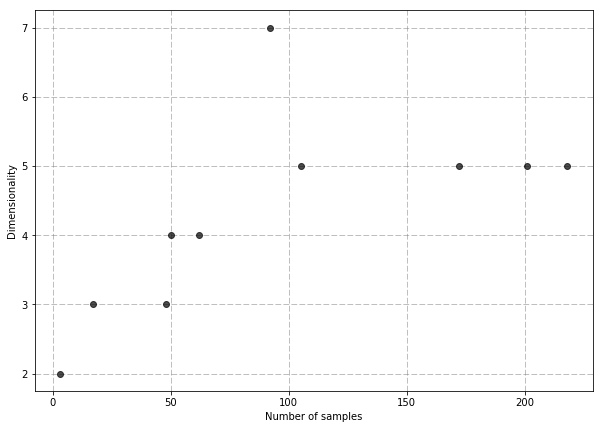

In [240]:
plt.figure(figsize=[10,7])
plt.plot(y,x,'ok', alpha = 0.7)
plt.xlabel('Number of samples')
plt.ylabel('Dimensionality')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray');

### 2. Graphs visualization

In [3]:
%run '../NN/scripts/Functions.ipynb'
import networkx as nx

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [13]:
df = pd.read_excel('SignEpiPairs.xlsx')
df = df[df.pBon<0.05]

for chunk in ['S9']:
    print chunk
    
    graph = df[df.SegN==int(chunk[1:])]
    graph = graph.reset_index(drop=True)
    nodes = {}

    for i in set(graph['VarPos']):
        nodes[i] = []
    for i in set(graph['SubPos']):
        nodes[i] = []

    for i in range(len(graph)):
        node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
        node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i])
        if node1 not in nodes[graph['VarPos'].ix[i]]:
            nodes[graph['VarPos'].ix[i]].append(node1)
        if node2 not in nodes[graph['SubPos'].ix[i]]:
            nodes[graph['SubPos'].ix[i]].append(node2)
            
    H = nx.Graph()
    H.size = {}
    H.color = {}
    H.width = {}
    edges = []

    for i in range(len(graph)):
        node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
        node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i])
        edges.append([node1, node2])


    for key in nodes:
        for node in nodes[key]:
            H.add_node(node)
            H.size[node]=10000
            H.color[node]='gray'

    edges = sorted(edges)

    for edge in edges:
        if [edge[1],edge[0]] in edges:
            H.add_edge(edge[0], edge[1], {'color':'#00AEEF', 'thickness':5})
        else:
            H.add_edge(edge[0], edge[1], {'color':'gray', 'thickness':2})

    color=[attribs['color'] for (v_from,v_to,attribs) in H.edges(data=True)]
    thickness=[attribs['thickness'] for (v_from,v_to,attribs) in H.edges(data=True)]
    
    nodeList = [x for x in H.nodes()]
    
    nodesDF = pd.DataFrame(columns = ['id','label'])
    nodesDF['id']=nodeList
    nodesDF['label']=nodeList
    nodesDF['position']=[int(x[:-2]) for x in nodeList]
    nodesDF.sort(['position'],inplace=True)
    nodesDF.to_csv('/home/katya/start/HIS3InterspeciesEpistasis/Analysis/Katya/dimensions/data/s' + str(chunk[1:]) + 'Nodes.csv')
    
    edgesDF = pd.DataFrame(columns=['source','target'], index=[x for x in range(len(edges))])
    
    edgeGroups = []
    for edge in edges:
        if [edge[1],edge[0]] in edges:
            edgeGroups.append(1)
        else:
            edgeGroups.append(0)
            
    edgesDF['source']=[x[0] for x in edges]
    edgesDF['target']=[x[1] for x in edges]
    edgesDF['group']=edgeGroups

    edgesDF.to_csv('/home/katya/start/HIS3InterspeciesEpistasis/Analysis/Katya/dimensions/data/s' + str(chunk[1:]) + 'Edges.csv')

S9


/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:59: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [14]:
chunk

'S9'

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, wil

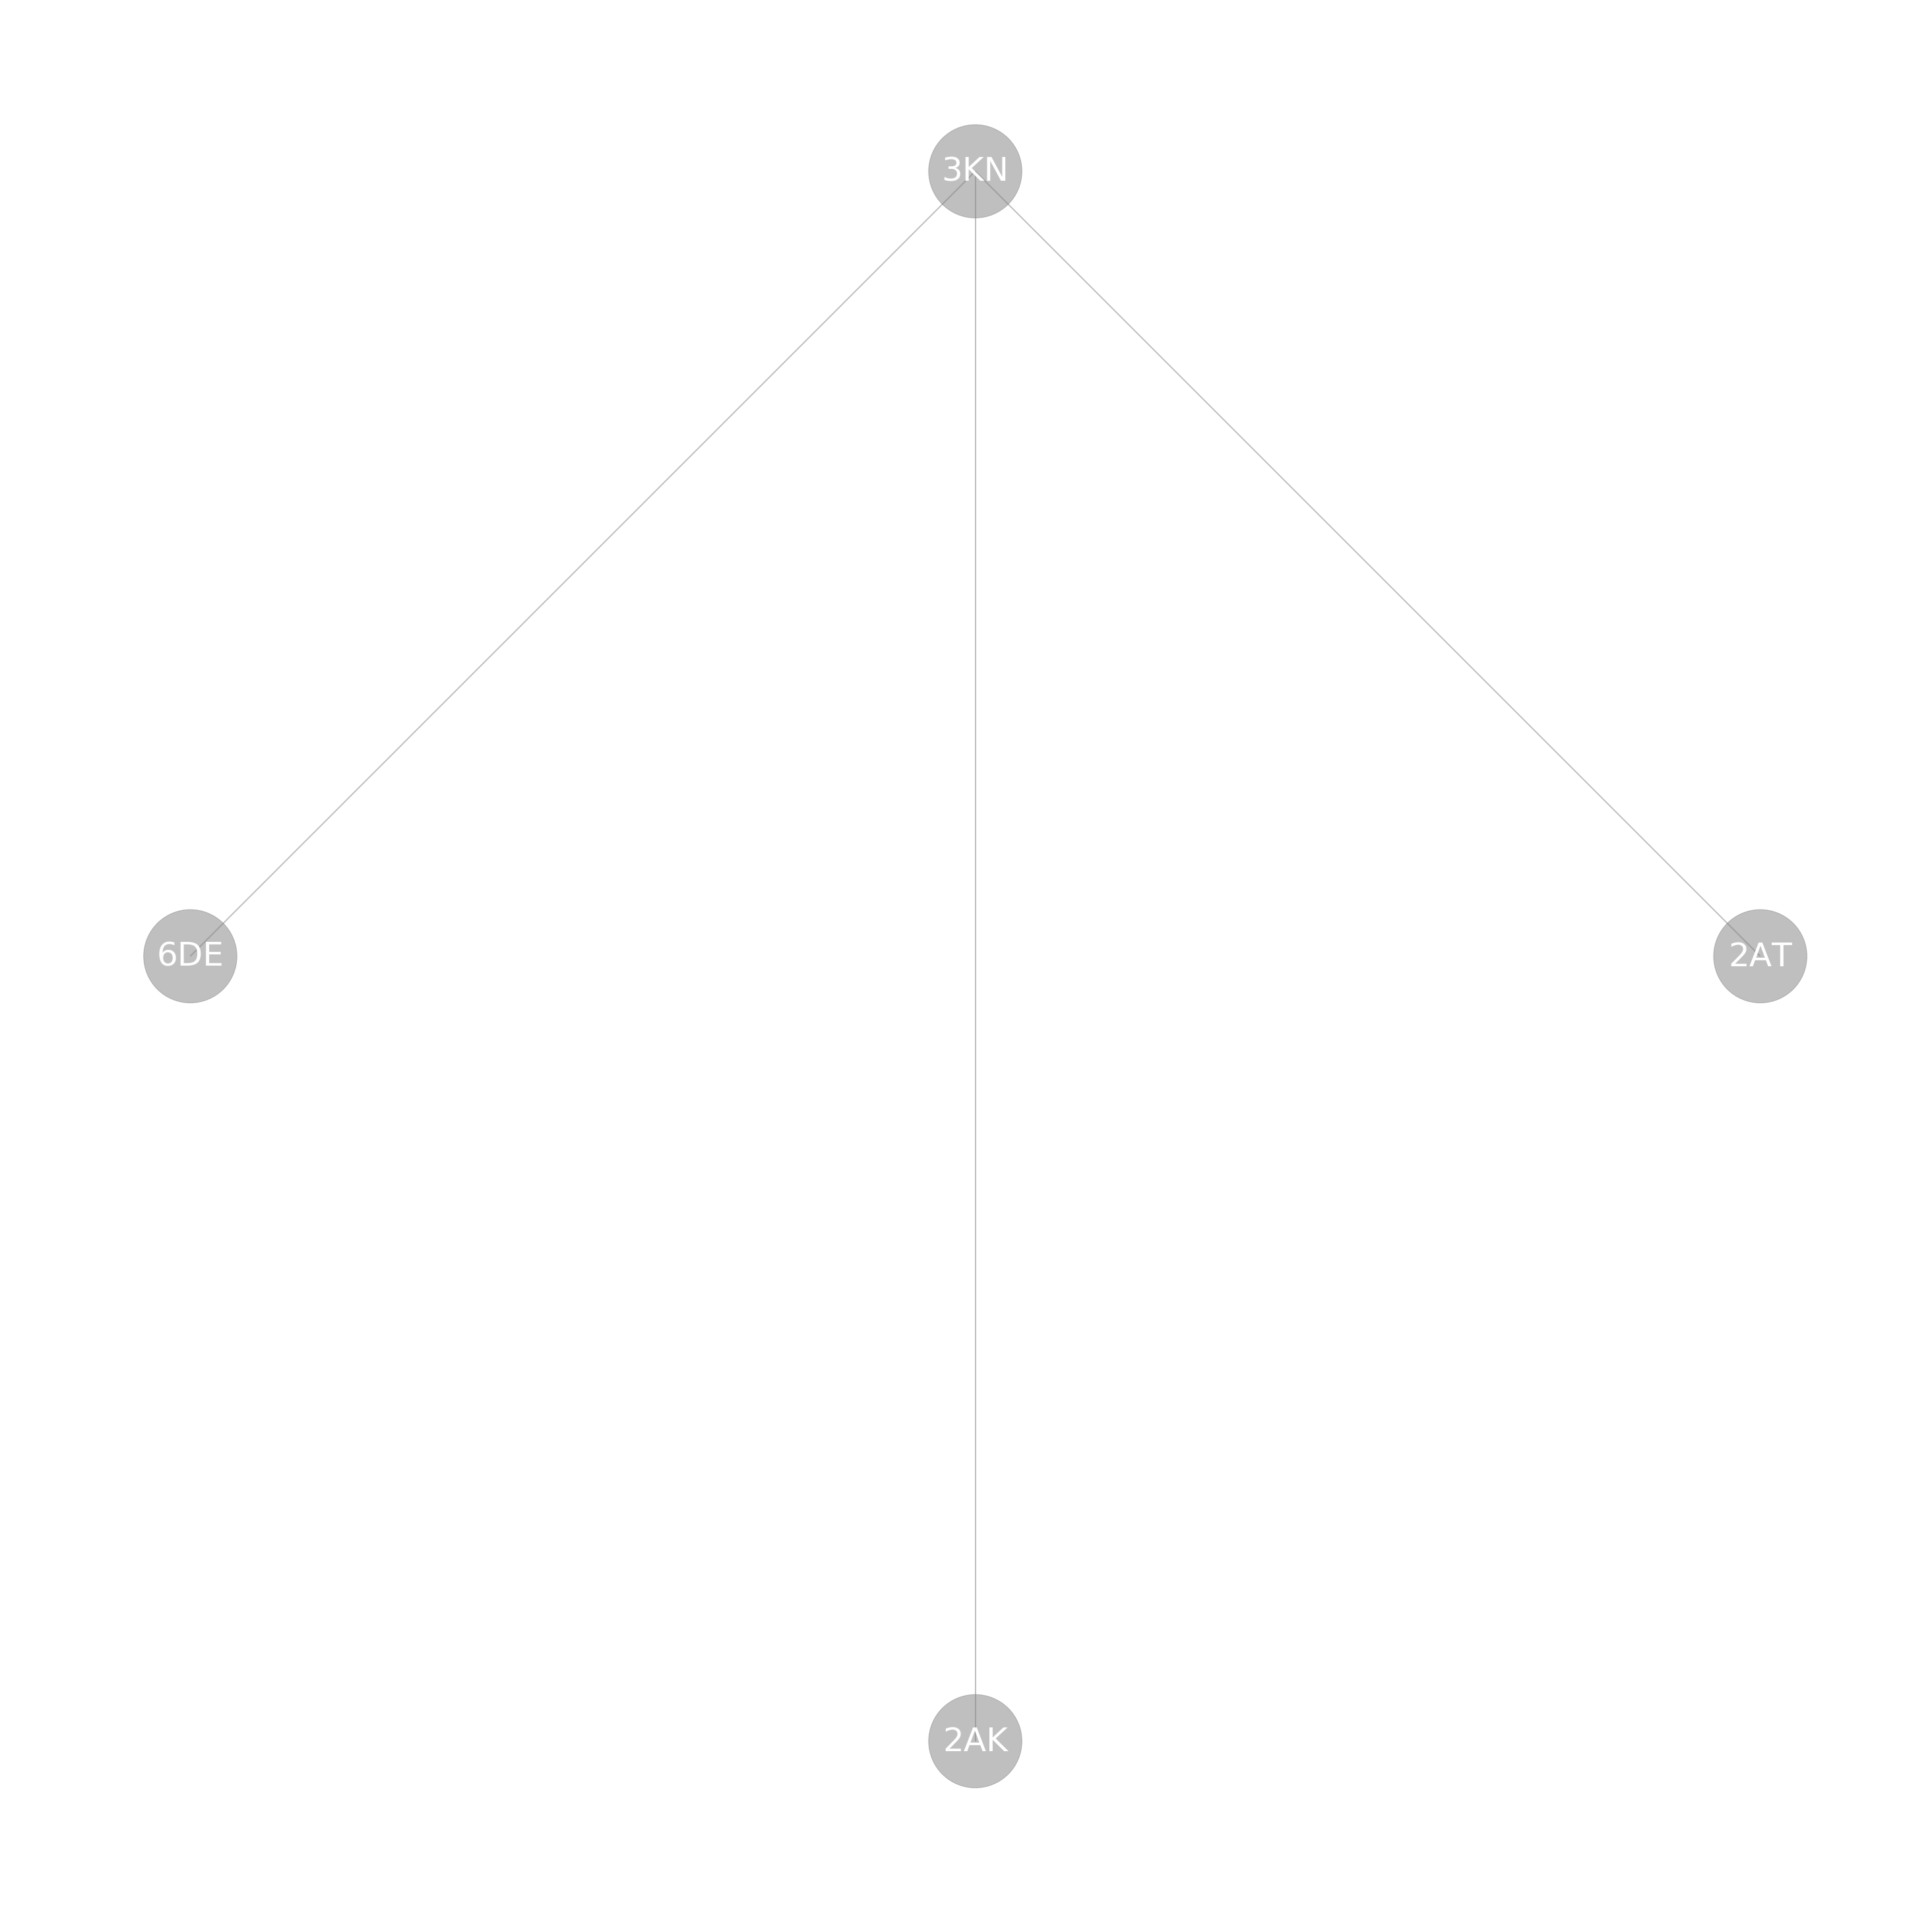

In [15]:
plt.figure(figsize=[40,40])
nx.draw_circular(H, with_labels=True,
                 node_size=20000, alpha=0.5, node_color=[H.color[v] for v in H],
                 font_size=50, font_color='white',edge_color=color,width=thickness)

***

# TESTING

In [31]:
H = nx.Graph()

In [32]:
nodes=['A10','A01','B10','B01','C10','C01','D01','D10']

for node in nodes:
    H.add_node(node)
    
for node1 in nodes:
    for node2 in nodes:
        H.add_edge(node1, node2, {'color':'gray','thickness':2})
        

In [33]:
max(nx.greedy_color(H).values())+1

8

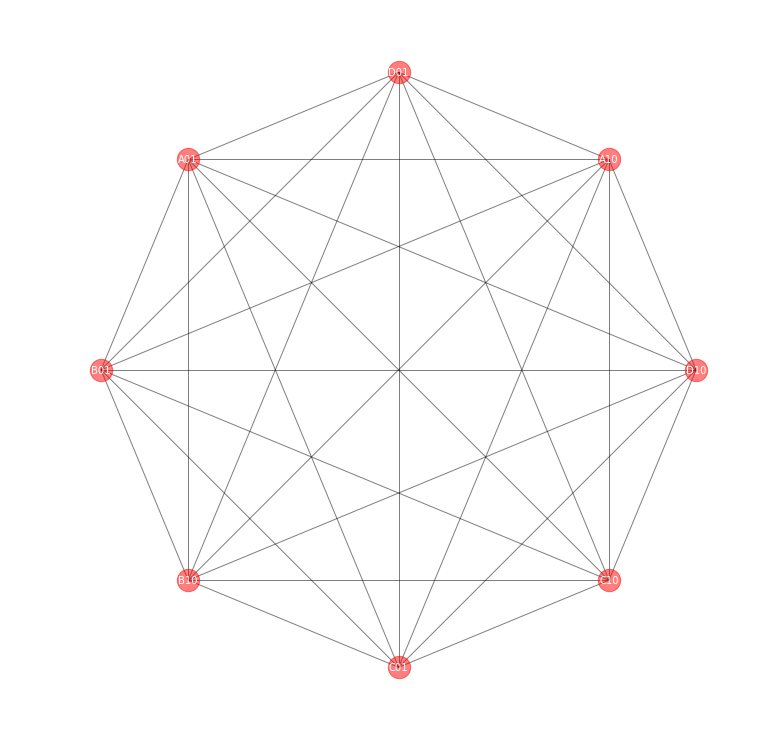

In [34]:
plt.figure(figsize=[10,10])
nx.draw_circular(H, with_labels=True,
                 node_size=500, alpha=0.5,
                 font_size=10, font_color='white')